In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Скачаем датасет, посмотрим на колонки, их типы и пропуски в данных

In [2]:
data = pd.read_csv('../airbnb/Airbnb_Data.csv')
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
data.shape

(74111, 29)

In [4]:
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
data.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [7]:
data = data.drop(['id', 'thumbnail_url', 'name', 'zipcode', 'latitude', 'longitude', 'description'], axis=1) #Удаляем, столбцы которые не будут использоваться в анализе

# Посмотрим на возможные значения и преобразуем некоторые колонки

In [8]:
for x in data.drop('amenities', axis=1).columns:
    print(data[x].value_counts(), '\n')
    print('==================================================================')

log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: count, Length: 767, dtype: int64 

property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet              

In [9]:
data['cleaning_fee'] = data['cleaning_fee'].map({True : 1, False : 0})
data['instant_bookable'] = data['instant_bookable'].map({'t' : 1, 'f' : 0})
data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'t' : 1, 'f' : 0})
data['host_identity_verified'] = data['host_identity_verified'].map({'t' : 1, 'f' : 0})
data['host_response_rate'] =  pd.to_numeric(data['host_response_rate'].str.rstrip('%'), errors='coerce')


In [10]:
data.describe()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,73923.000000,73923.000000,55812.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,0.734075,0.996943,0.672971,94.351967,0.262458,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,0.441828,0.055208,0.469131,16.341817,0.439973,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,92.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,23.000000,100.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,1.000000,1.000000,1.000000,100.000000,1.000000,605.000000,100.000000,10.000000,18.000000


In [11]:
data.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

In [12]:
num_cols = ['log_price', 'accommodates', 'bathrooms', 'number_of_reviews',
           'bedrooms', 'beds', 'review_scores_rating']
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'host_has_profile_pic', 
            'host_identity_verified', 'host_response_rate', 'instant_bookable', 'city', 'neighbourhood']

# Визуализируем распределение данных

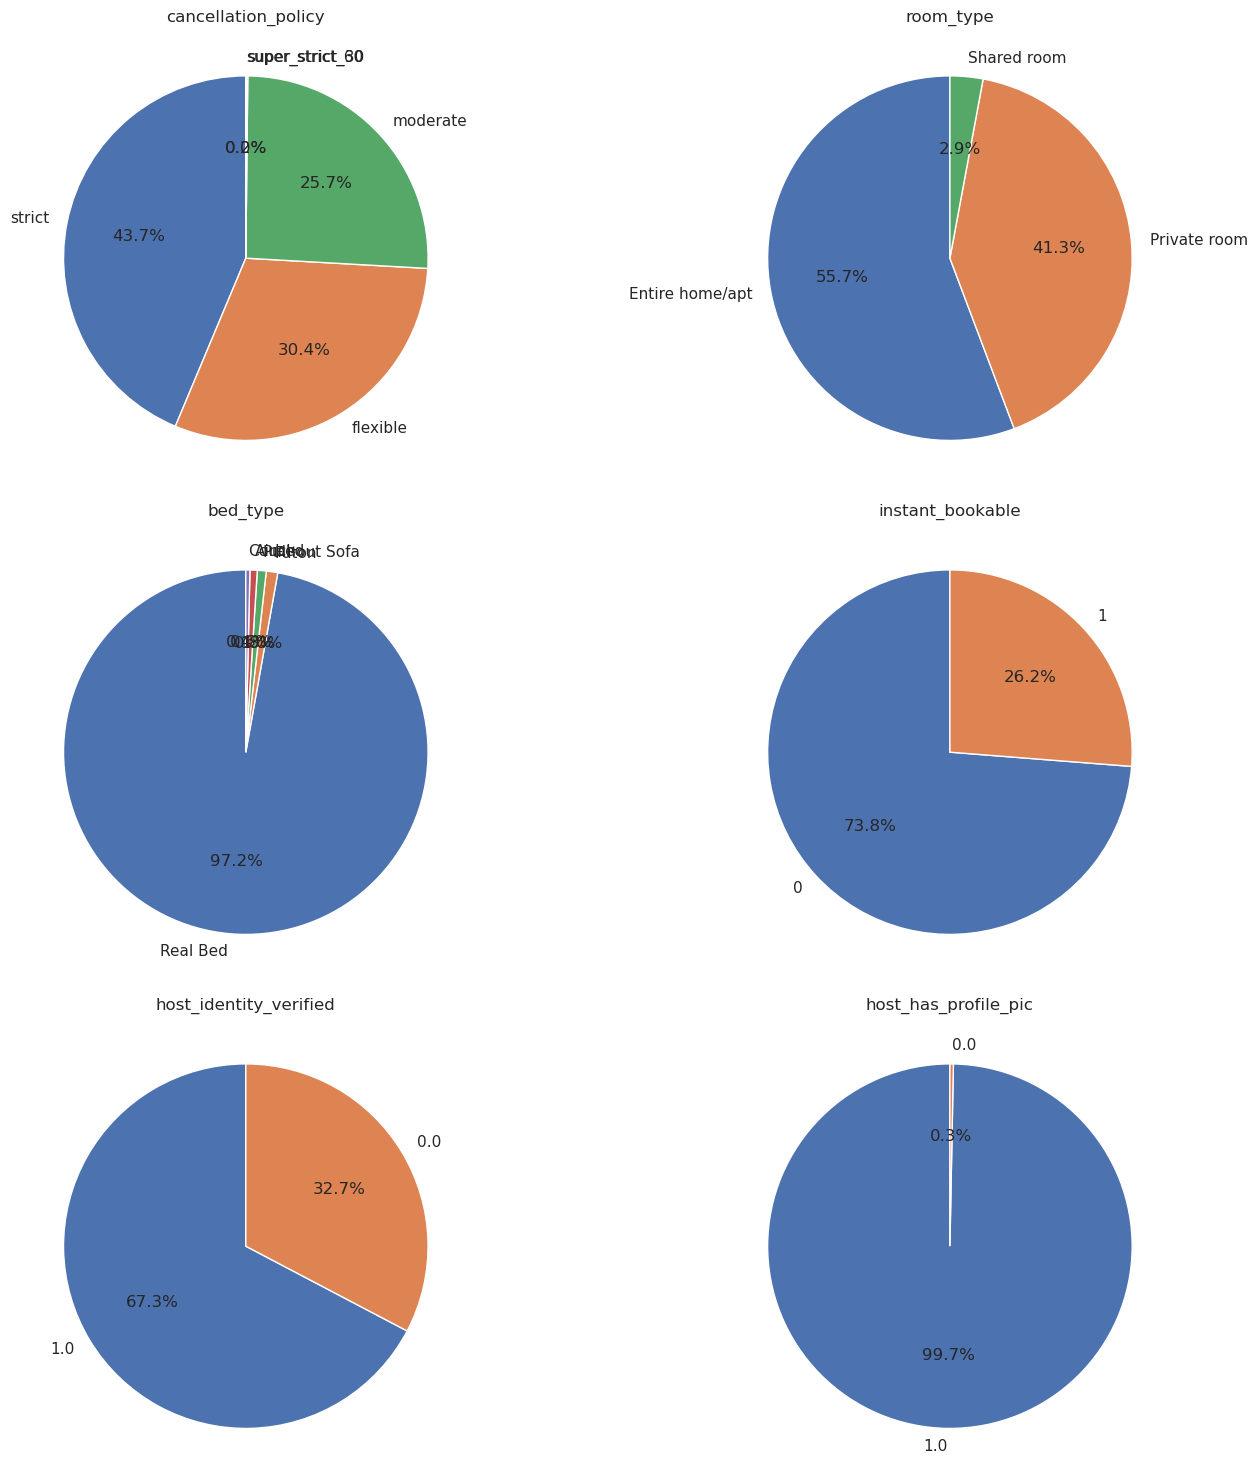

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
count = -1
for i, column in enumerate(['cancellation_policy', 'room_type', 'bed_type', 
                            'instant_bookable', 'host_identity_verified', 
                            'host_has_profile_pic']):
    labels = data[column].value_counts().index
    sizes = data[column].value_counts().values
    if i % 2 == 0:
        count += 1
    axes[count, i % 2].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[count, i % 2].set_title(column)

plt.tight_layout()

plt.show()

In [14]:
def plot_catplot(h,v,he,a):
    sns.set(style="whitegrid")
    sns.catplot(x=h,kind=v,data=data,height=he, aspect = a)
    plt.tight_layout()

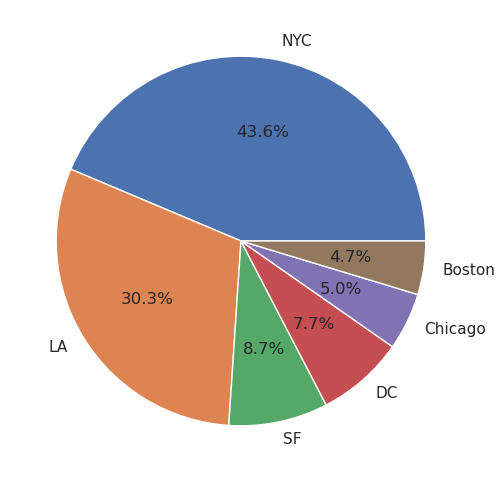

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(data['city'].value_counts().values, labels=data['city'].value_counts().index,
      autopct='%1.1f%%')
plt.show()

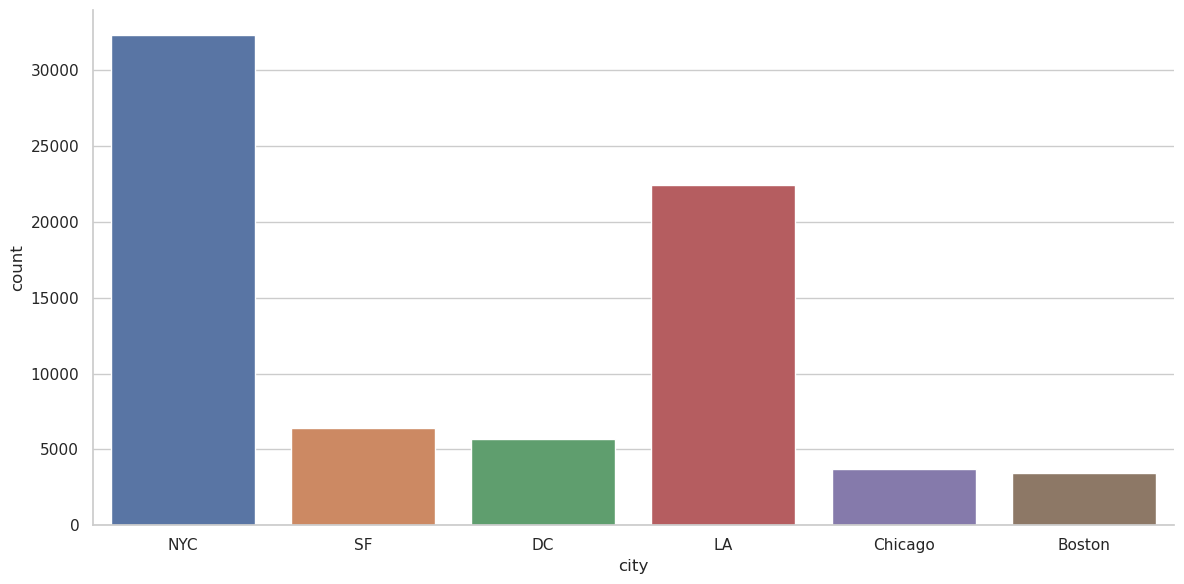

In [47]:
plot_catplot("city", "count", 6, 2)

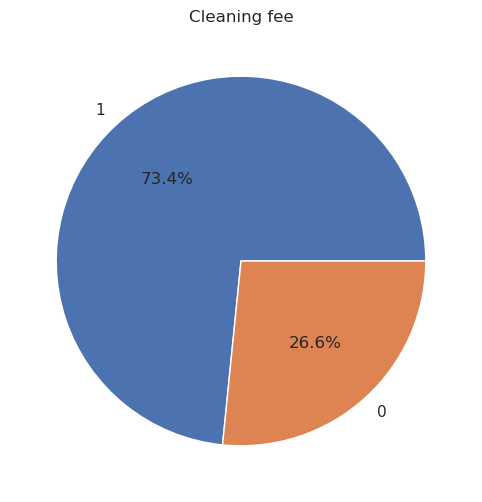

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(data['cleaning_fee'].value_counts().values, labels=data['cleaning_fee'].value_counts().index,
      autopct='%1.1f%%')
plt.title('Cleaning fee')
plt.show()

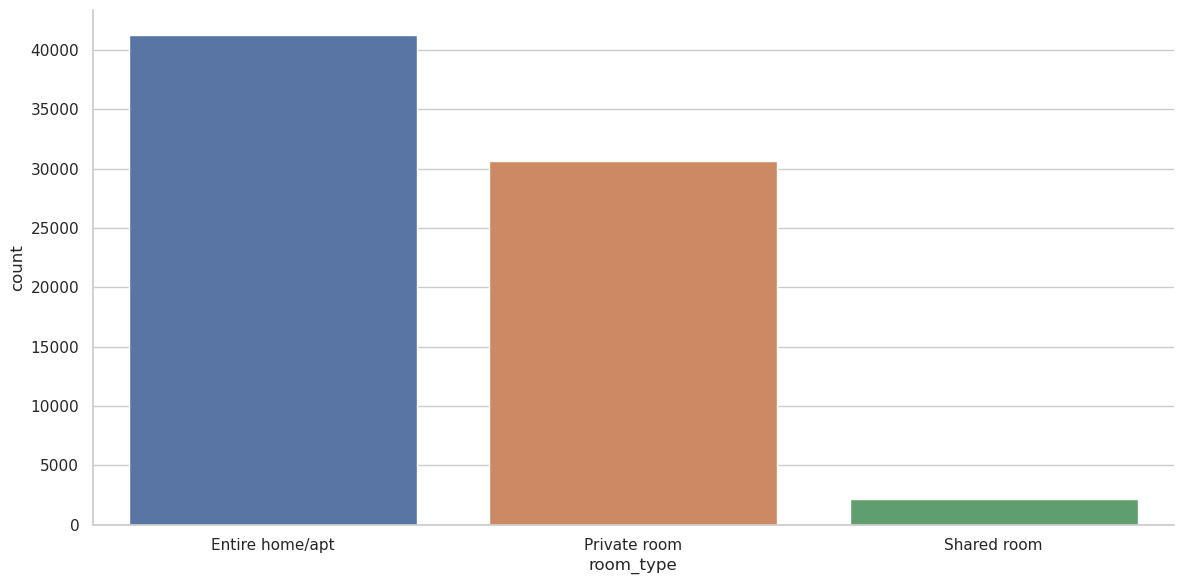

In [44]:
plot_catplot("room_type", "count", 6, 2)

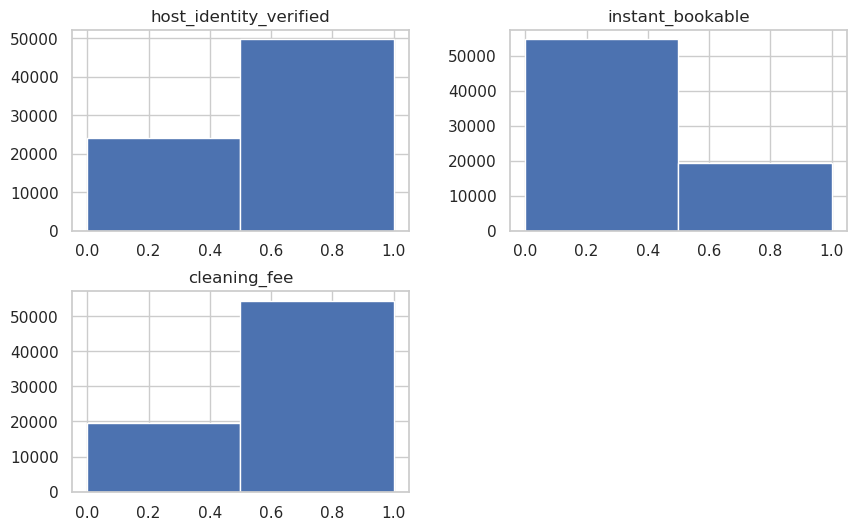

In [43]:
data[['host_identity_verified', 'instant_bookable', 'cleaning_fee']].hist(figsize=(10, 6), bins=2)
plt.show()

<Axes: xlabel='log_price', ylabel='Density'>

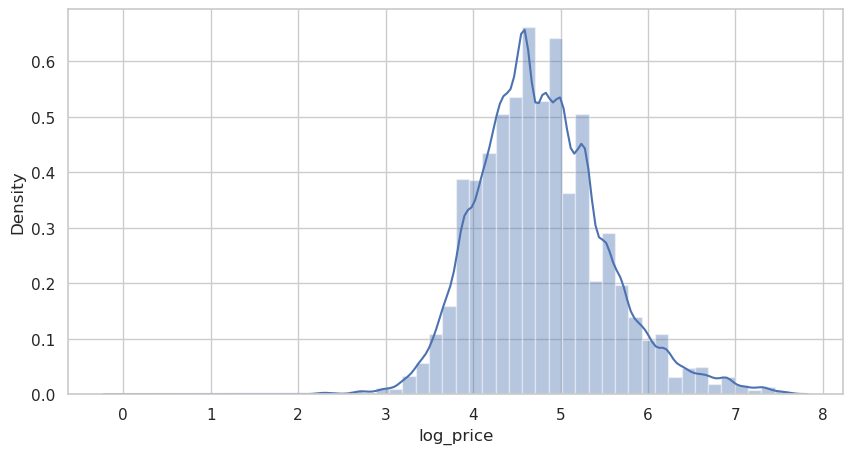

In [37]:
plt.figure(figsize=(10, 5))
sns.distplot(data['log_price'])

<Axes: xlabel='host_response_rate', ylabel='Density'>

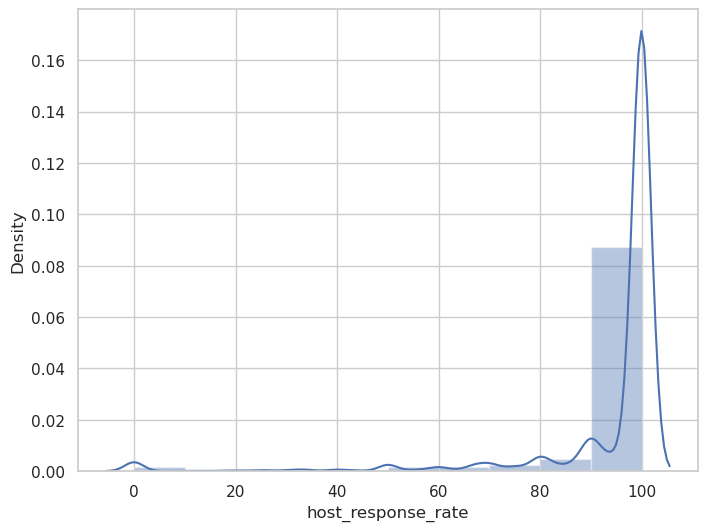

In [35]:
plt.figure(figsize=(8, 6))
sns.distplot(data['host_response_rate'], bins=10)

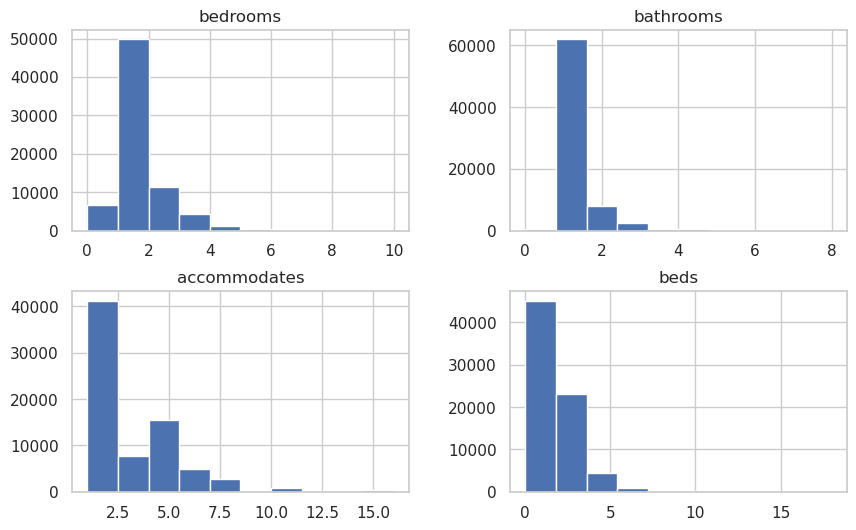

In [31]:
data[['bedrooms', 'bathrooms', 'accommodates', 'beds']].hist(figsize=(10, 6), bins=10)
plt.show()

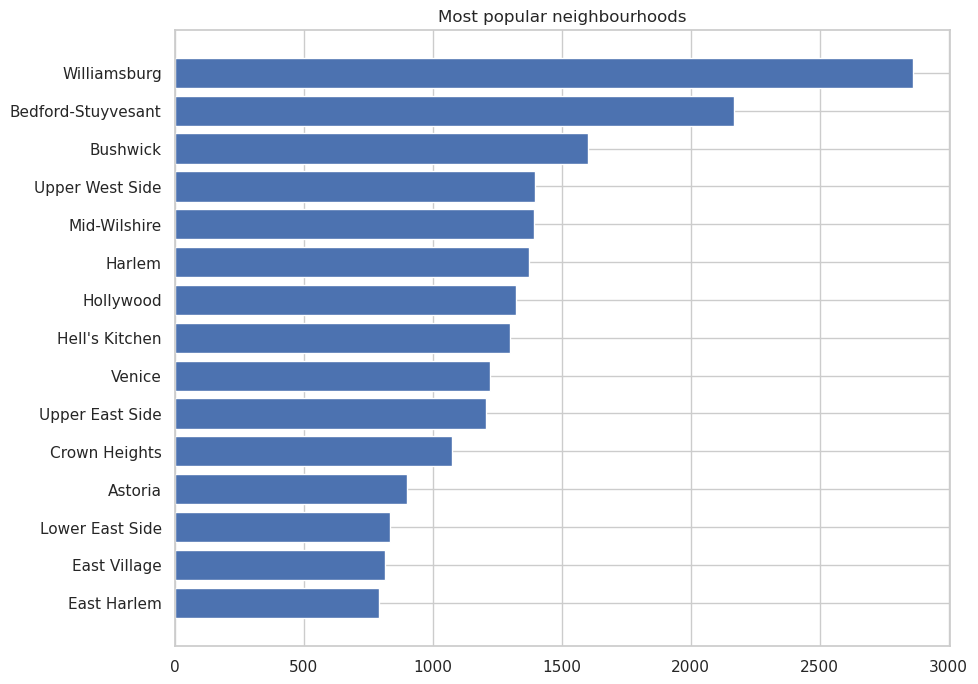

In [28]:
neighbourhoods = data['neighbourhood'].value_counts()[:15]
plt.figure(figsize=(10, 8))
x = list(neighbourhoods.index)
y = list(neighbourhoods.values)
x.reverse()
y.reverse()

plt.title("Most popular neighbourhoods")

plt.barh(x,y)
plt.show()

# Рассмотрим взаимосвязь переменных

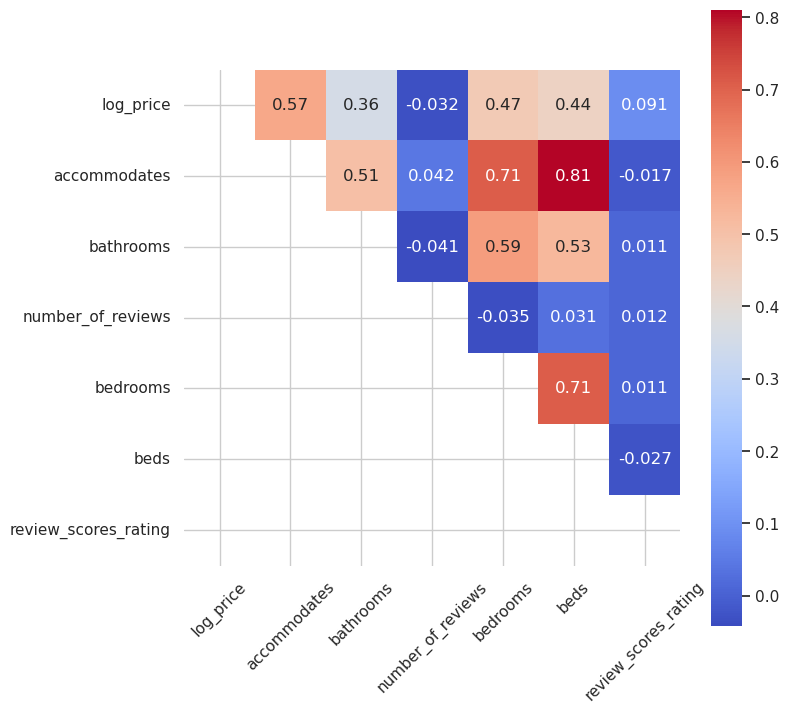

In [27]:
plt.figure(figsize = (8,8))
matrix = np.tril(data[num_cols].corr())
sns.heatmap(data[num_cols].corr(), annot=True, mask=matrix, cmap='coolwarm', square=True)
plt.xticks(rotation=45)
plt.show()

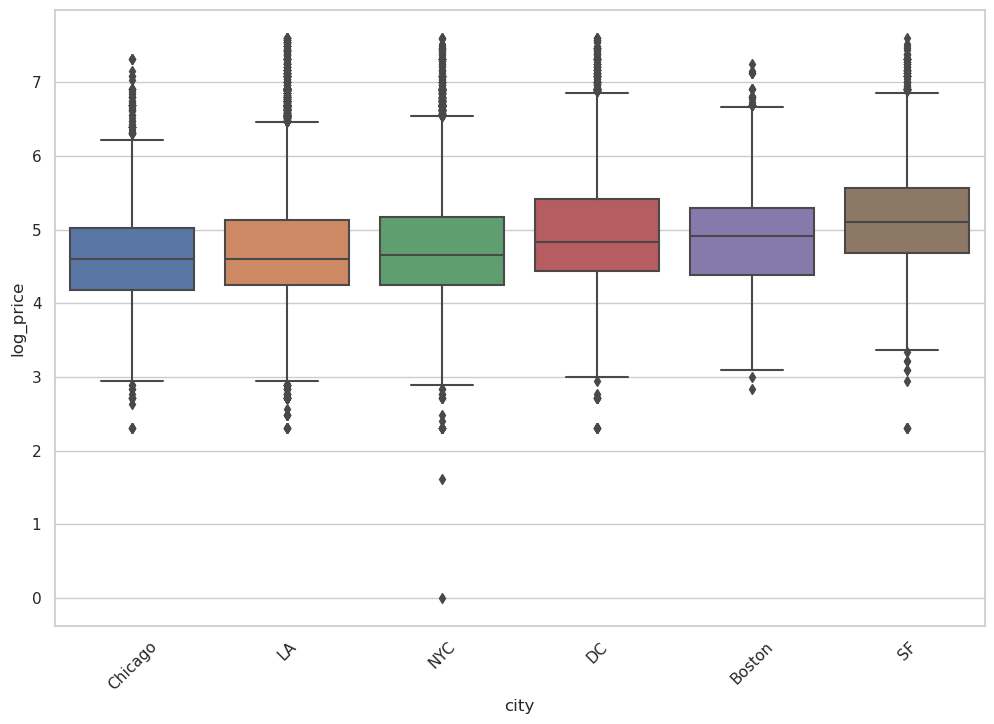

In [54]:
mean_log_price = data.groupby('city')['log_price'].median().reset_index()

sorted_cities = mean_log_price.sort_values('log_price')['city']
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='log_price', data=data, order=sorted_cities)
plt.xticks(rotation=45)
plt.show()

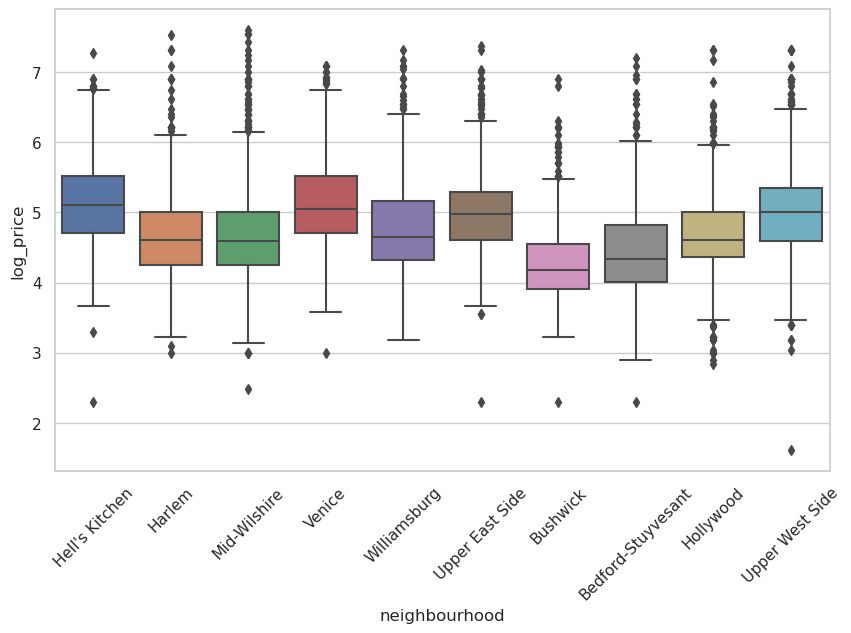

In [59]:
most_popular_neighbourhood = data['neighbourhood'].value_counts()[:10].index.to_list()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.boxplot(x='neighbourhood', y='log_price', data=data[data['neighbourhood'].isin(most_popular_neighbourhood)])
plt.show()

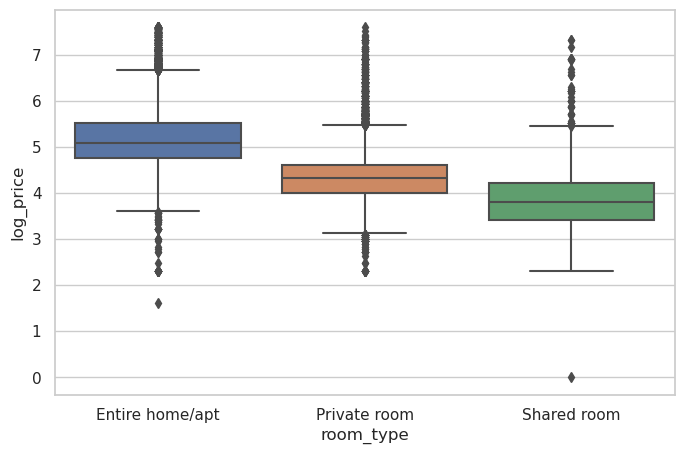

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='log_price', data=data)
plt.show()

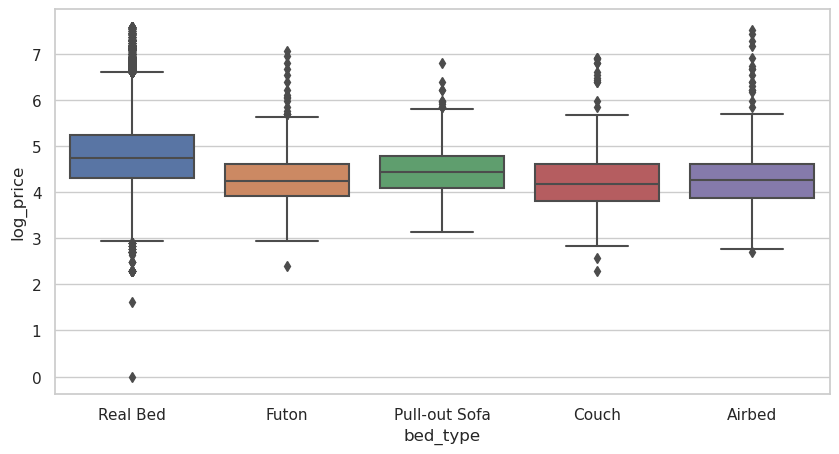

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bed_type', y='log_price', data=data)
plt.show()

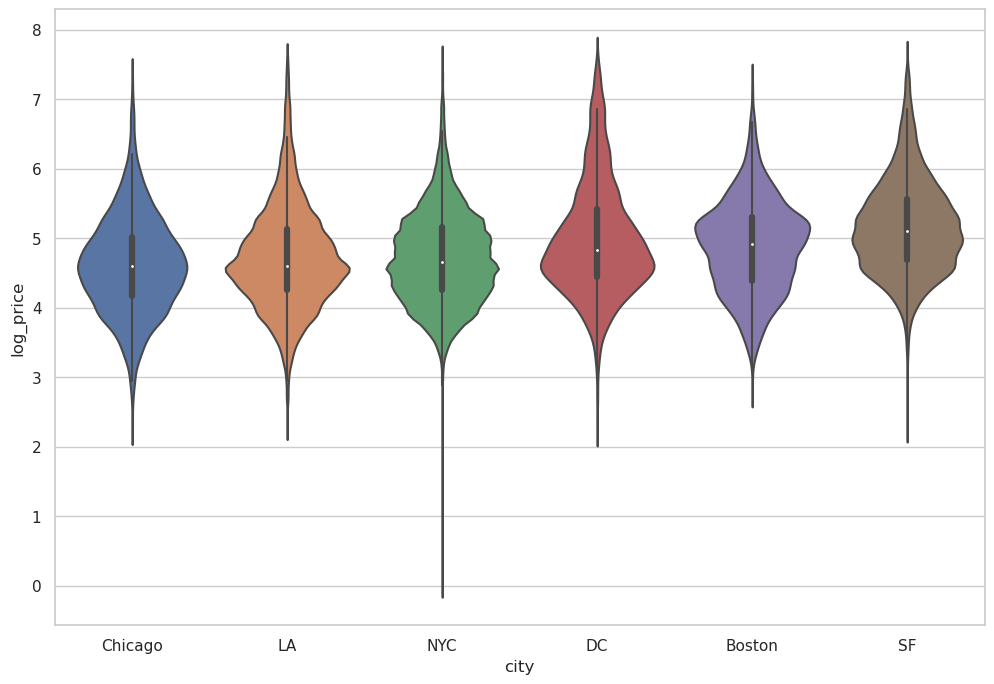

In [71]:
plt.figure(figsize=(12,8))
sns.violinplot(data=data, x='city', y='log_price', order=sorted_cities)
plt.show()

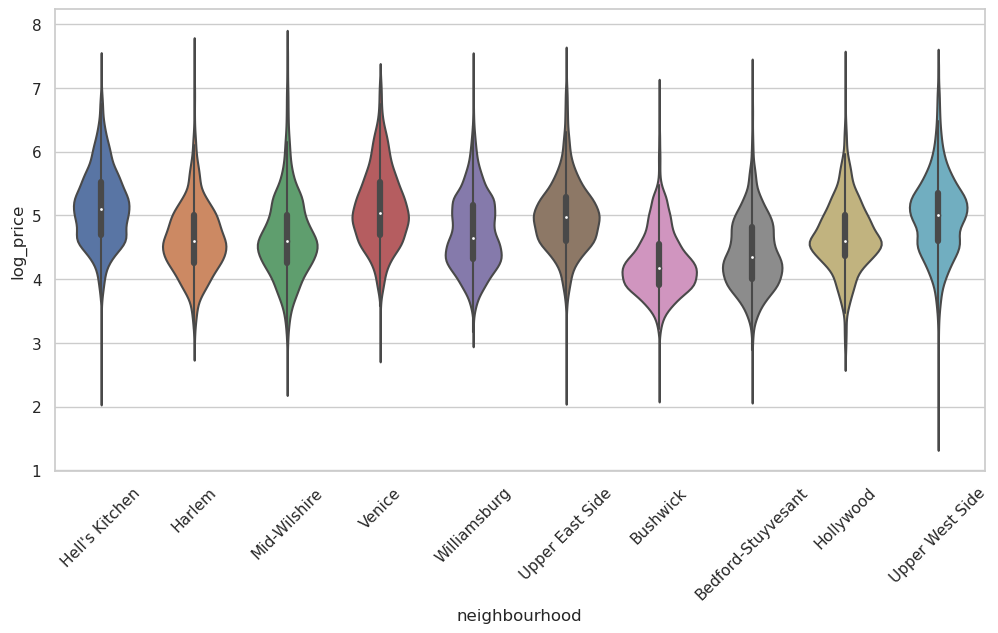

In [73]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.violinplot(x='neighbourhood', y='log_price', data=data[data['neighbourhood'].isin(most_popular_neighbourhood)])
plt.show()

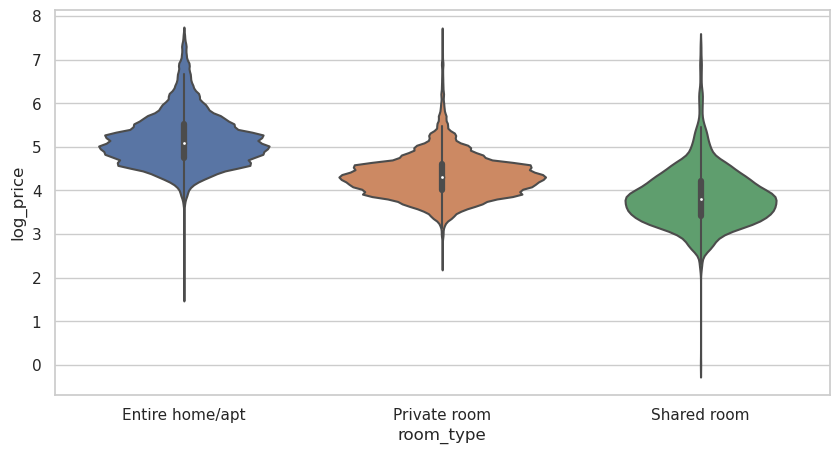

In [75]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='room_type', y='log_price', data=data)
plt.show()

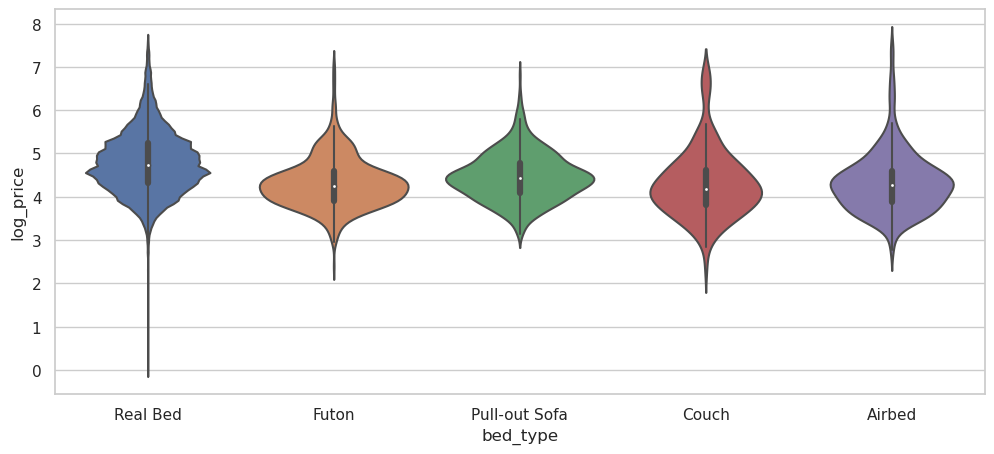

In [77]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='bed_type', y='log_price', data=data)
plt.show()

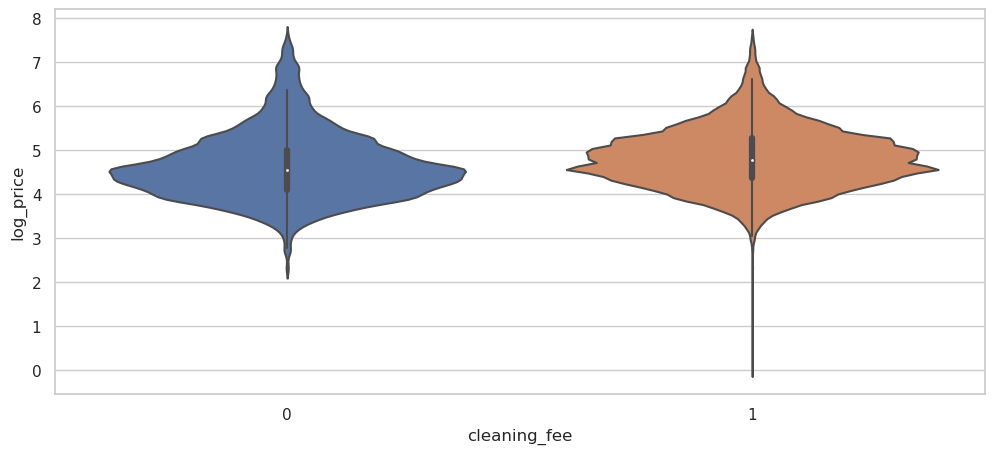

In [86]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='cleaning_fee', y='log_price', data=data)
plt.show()

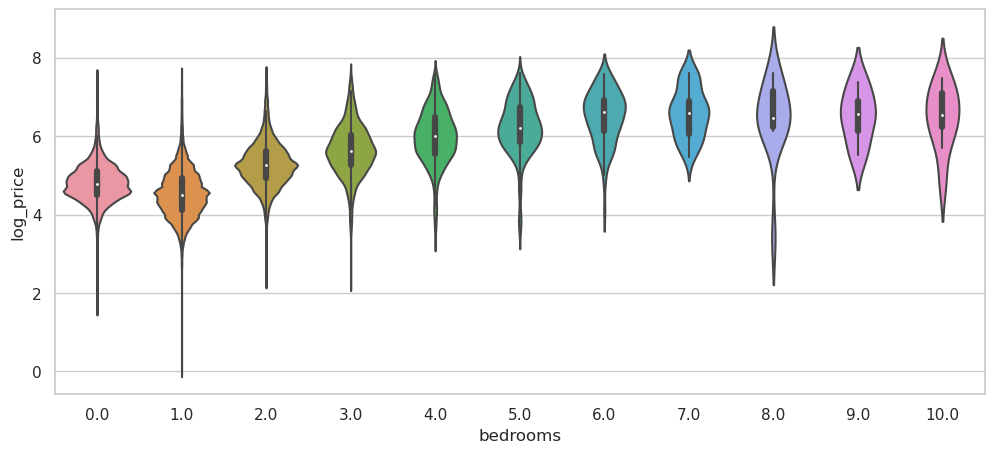

In [95]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='bedrooms', y='log_price', data=data)
plt.show()

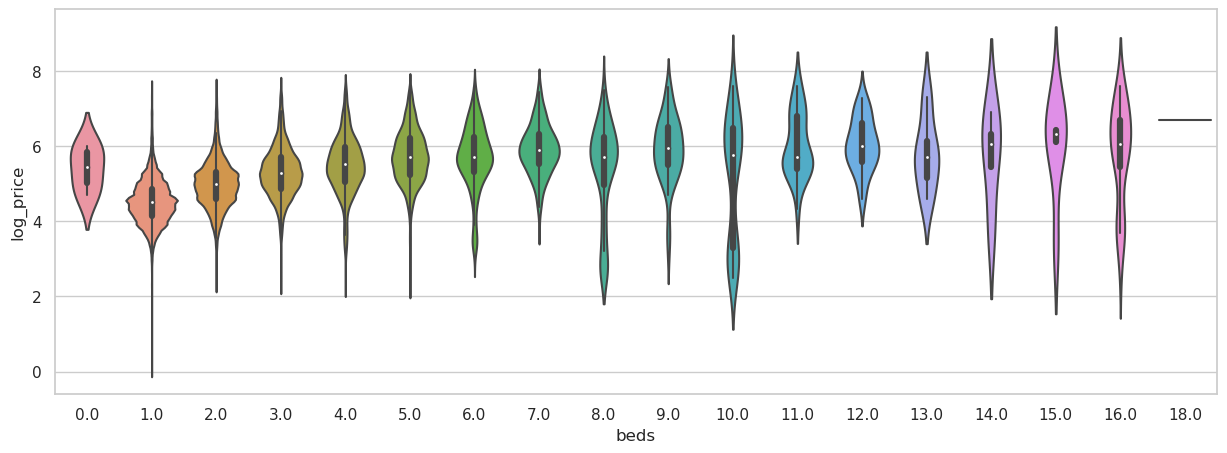

In [97]:
plt.figure(figsize=(15, 5))
sns.violinplot(x='beds', y='log_price', data=data)
plt.show()

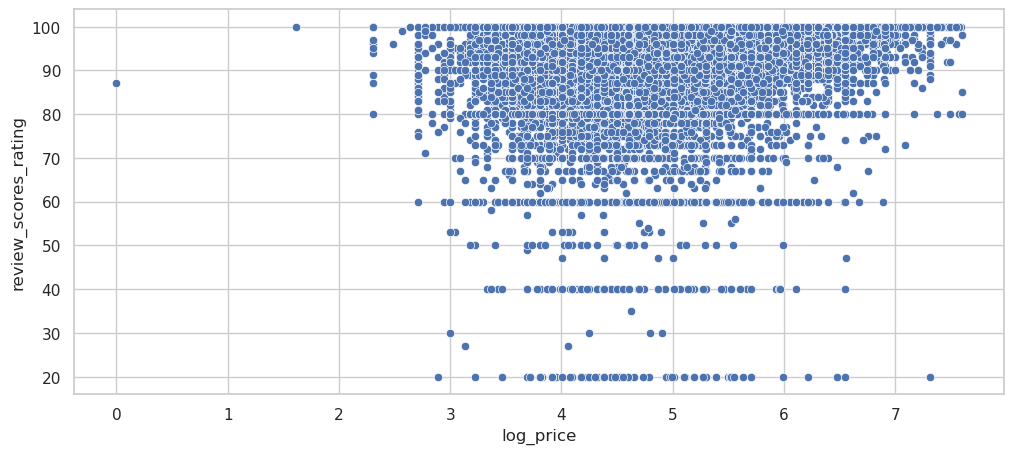

In [99]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='log_price', y='review_scores_rating', data=data)
plt.show()

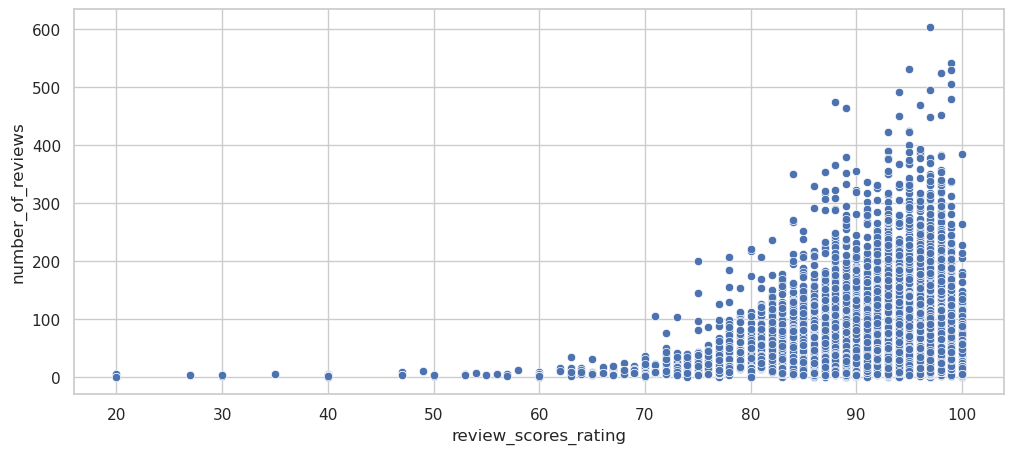

In [100]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', data=data)
plt.show()

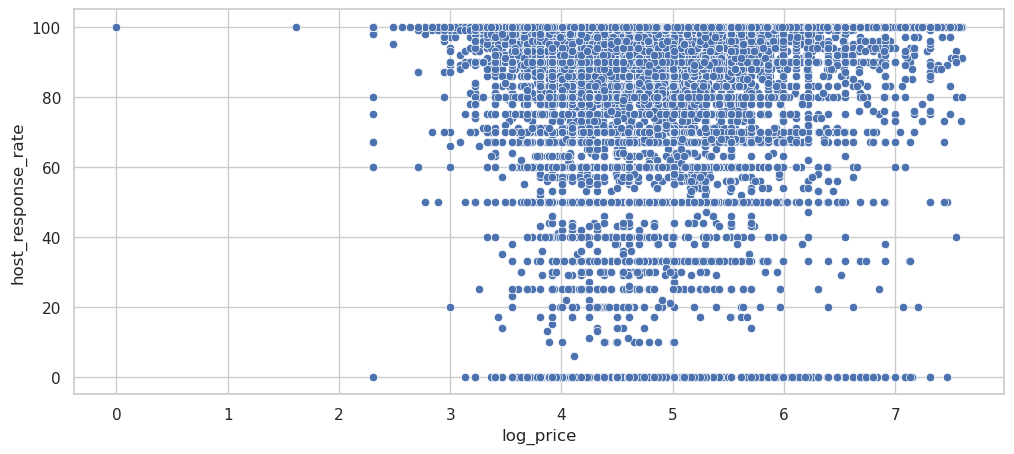

In [102]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='log_price', y='host_response_rate', data=data)
plt.show()

# Преобразуем колонку amentities

In [78]:
amenities = set()
for x in data['amenities']:
    for y in x[1:-1].replace('"', '').split(','):
        if y != '':
            amenities.add(y) 
amenities

{' smooth pathway to front door',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',

## Заметим, что есть похожие теги

In [79]:
def replace_same_amentities(line):
    replaced_line = line.replace(" smooth pathway to front door", "smooth pathway to front door").replace(
    "Bathtub with shower chair", "Bathtub").replace(
    "Cat(s)", "Dog(s)").replace("Dog(s)", "Pets allowed").replace("Doorman Entry", "Doorman").replace(
    "Elevator in building", "Elevator").replace("Firm matres", "Firm mattress").replace(
        "Hot tub", "Hot water").replace("Other pet(s)", "Pets allowed"
    ).replace("Smart lock", "Smartlock").replace(
    "Wide clearance to shower & toilet", "Wide clearance to shower and toilet").replace(
        'Wide doorway', 'Wide entryway').replace(
    'translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50').replace(
    'translation missing: en.hosting_amenity_50', 'Other')
    return replaced_line

In [80]:
data['amenities'] = data['amenities'].apply(replace_same_amentities)

In [82]:
data['amenities'] = data['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))

## Применим OneHotEncoding

In [84]:
for amenitity in amenities:
    data[amenitity] = data['amenities'].apply(lambda x: 1 if amenitity in x else 0)
data = data.drop('amenities', axis=1)

In [85]:
data.shape

(74111, 139)